### Tatiana Frolova
### Data Analysis Titanic Database
#### Questions:

* What is the probability that a child who is in third class and is 10 years old or younger survives?
* How much did people pay to be on the ship (average)? 
* What were the lowest and highest fares paid by passenger-class?
* Lost vs survived by sex.
* Lost vs survived by class.
* Calculate the conditional probability that a person survives given their sex and passenger-class.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [169]:
tmain = pd.read_csv("titanic.csv")
tmain

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


### Genaral data

In [52]:
tmain.Sex.value_counts()

male      573
female    314
Name: Sex, dtype: int64

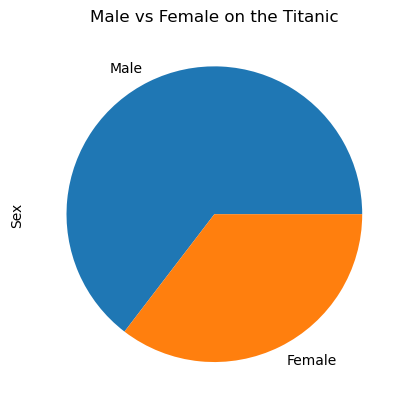

In [56]:
tmain.Sex.value_counts().plot(kind = "pie", labels = ["Male", "Female"] )
plt.title("Male vs Female on the Titanic")
plt.show()

In [47]:
tmain.Survived.value_counts()

0    545
1    342
Name: Survived, dtype: int64

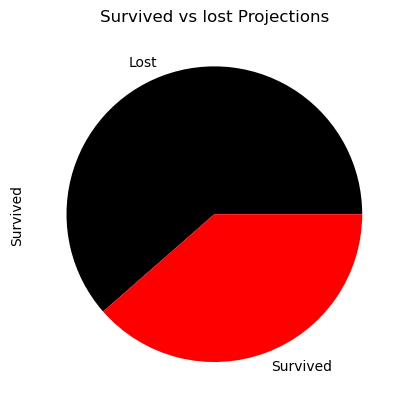

In [55]:
tmain.Survived.value_counts().plot(kind = "pie", colors = ["black", "red"], labels = ["Lost", "Survived"] )
plt.title("Survived vs lost Projections")
plt.show()

In [52]:
tmain.isnull()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
882,False,False,False,False,False,False,False,False
883,False,False,False,False,False,False,False,False
884,False,False,False,False,False,False,False,False
885,False,False,False,False,False,False,False,False


In [4]:
#check for null values example
tmain.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [5]:
# check data summary
tmain.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [7]:
# check gerenal information about data
tmain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


### Question 1
### What is the probability that a child who is in third class and is 10 years old or younger survives?

In [8]:
child = tmain[["Survived", "Pclass", "Age"]]
child

,Survived,Pclass,Age
0,0,3,22.0
1,1,1,38.0
2,1,3,26.0
3,1,1,35.0
4,0,3,35.0
...,...,...,...
882,0,2,27.0
883,1,1,19.0
884,0,3,7.0
885,1,1,26.0


In [9]:
#Selecting rows
child = child.loc[child["Age"] <= 10]
child = child.loc[child["Pclass"] == 3]

In [10]:
child_survived = child.loc[child["Survived"] == 1]
child_sink = child.loc[child["Survived"] == 0]

In [11]:
child_survived.head(10)

,Survived,Pclass,Age
10,1,3,4.0
64,1,3,7.0
127,1,3,2.0
164,1,3,9.0
171,1,3,1.0
183,1,3,4.0
232,1,3,5.0
259,1,3,3.0
346,1,3,3.0
379,1,3,1.0


Text(0, 0.5, 'Values')

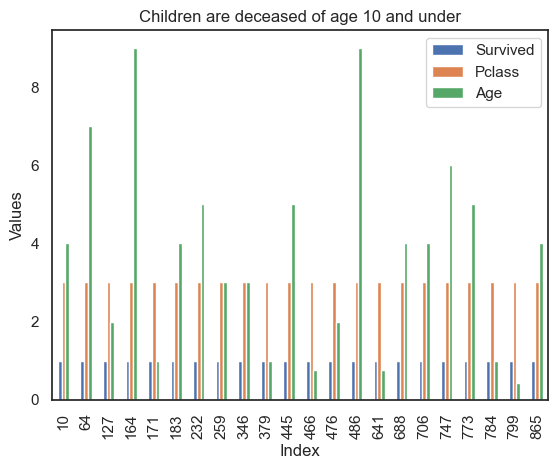

In [30]:
child_survived.plot(kind = "bar",  title = "Children are survived of age 10 and under")
plt.xlabel("Index")
plt.ylabel("Values")

In [12]:
child_sink.head(10)

,Survived,Pclass,Age
7,0,3,2.0
16,0,3,2.0
24,0,3,8.0
49,0,3,7.0
62,0,3,4.0
118,0,3,2.0
146,0,3,9.0
158,0,3,5.0
163,0,3,1.0
170,0,3,4.0


Text(0, 0.5, 'Values')

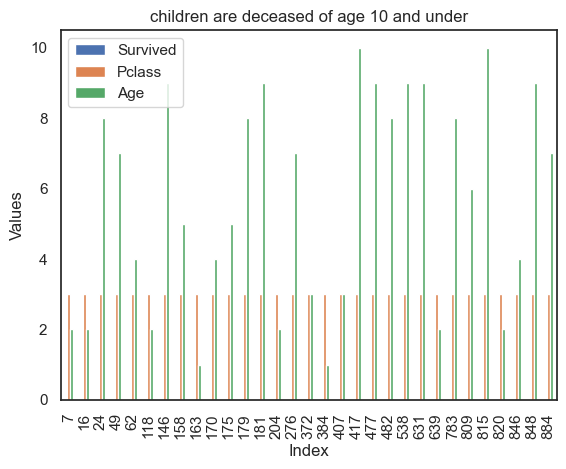

In [31]:
child_sink.plot(kind = "bar", title = "children are deceased of age 10 and under")
plt.xlabel("Index")
plt.ylabel("Values")

In [13]:
total_children = child.count()
total_children

Survived    53
Pclass      53
Age         53
dtype: int64

In [14]:
chidren_survived = child_survived.count() 
chidren_survived

Survived    22
Pclass      22
Age         22
dtype: int64

In [15]:
#probability = (survived/total children) * 100
probab_survived = round((chidren_survived / total_children) * 100, 2)
probab_survived

Survived    41.51
Pclass      41.51
Age         41.51
dtype: float64

### The probability that a child who is in third class and is 10 years old or younger survives aproximatly 41.51 % based on data

### End question 1

### Question 2
### How much did people pay to be on the ship (average)?

In [117]:
pay = tmain[["Fare"]].mean()
pay

Fare    32.30542
dtype: float64

Text(0.5, 1.0, 'Mean Fare by class Projections')

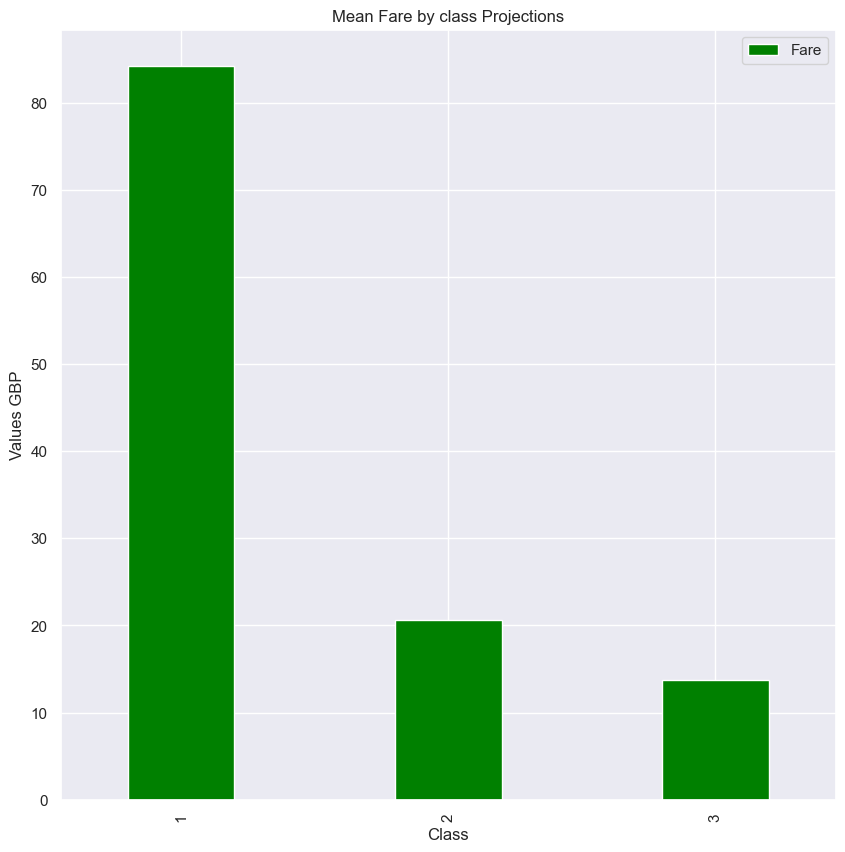

In [128]:
payplot = tmain.groupby("Pclass")[["Fare"]].mean()
payplot.plot.bar(color = "green", width = 0.4, align = "center")
plt.xlabel("Class")
plt.ylabel("Values GBP")
plt.title("Mean Fare by class Projections")

### People paid to be on the ship on the average 32 GBP based on data based on data

### End question 2

### Question 3
### What were the lowest and highest fares paid by passenger-class? 

In [170]:
rateFair = tmain[["Pclass", "Fare"]]

In [144]:
rateFair

,Pclass,Fare
0,3,7.2500
1,1,71.2833
2,3,7.9250
3,1,53.1000
4,3,8.0500
...,...,...
882,2,13.0000
883,1,30.0000
884,3,23.4500
885,1,30.0000


In [163]:
dfrf = rateFair.groupby("Pclass")

In [137]:
dfrf.describe()

Fare                                                              
        count       mean        std  min       25%      50%   75%       max
Pclass                                                                     
1       216.0  84.154687  78.380373  0.0  30.92395  60.2875  93.5  512.3292
2       184.0  20.662183  13.417399  0.0  13.00000  14.2500  26.0   73.5000
3       487.0  13.707707  11.817309  0.0   7.75000   8.0500  15.5   69.5500

### Mean average fares(in British Pounds GBP) based on data
#### Fares Summary
#### Average Mean paid by class:
    First class 84 GBP
    Second class 20 GBP
    Third class 13 GBP
#### Highest fare paind was:
    First class 512 GBP
    Second class 73 GBP
    Third class 69 GBP
### Lowest fare paid was:
    First class 0 GBP
    Second class 0 GBP
    Third class 0 GBP


### End Question 3

### Question4. Lost vs survived by sex.
### In other words: How many people get lost and how many people get survived if they are male or female? 
### What is probability survival and deceaseval rate (%) for Male and Female on the Titanic?

#### Code for calculating Probability(in %) and Count(in people) Lost vs Survived for Male

In [3]:
# New data frame
data = tmain[["Survived", "Sex"]]

In [4]:
#Selecting rows for male
data = data.loc[data["Sex"] == "male"]

In [5]:
# Selecting row for survival vs lost
dataM_survived = data.loc[data["Survived"] == 1]
dataM_sink = data.loc[data["Survived"] == 0]

In [6]:
# Count total Male
total_male = data.count()
total_male

Survived    573
Sex         573
dtype: int64

In [7]:
# Count total male survived
dataM_survived = dataM_survived.count() 
dataM_survived

Survived    109
Sex         109
dtype: int64

In [8]:
# Count total male who get lost
dataM_sink = dataM_sink.count() 
dataM_sink

Survived    464
Sex         464
dtype: int64

In [9]:
# Calculation probability of Male who survived
probab_survived_male = round((dataM_survived / total_male) * 100, 2)
probab_survived_male

Survived    19.02
Sex         19.02
dtype: float64

In [10]:
# Calculation Male who get lost
probab_sink_male = round((dataM_sink/ total_male) * 100, 2)
probab_sink_male

Survived    80.98
Sex         80.98
dtype: float64

### Analysis & Interpretetion
#### Results of calculation above show there is evindents that:
* Out of total 573 Male 109 people got survived and 464 people got lost.
* Probaility survived male rate is 19.02% and deceased male rate is 80.98%.

#### Code for calculating Probability(%) and Count (in people) Lost vs Survived for female

In [74]:
#Selecting rows for female
data = data.loc[data["Sex"] == "female"]

In [75]:
#Selecting row for survival vs lost
dataF_survived = data.loc[data["Survived"] == 1]
dataF_sink = data.loc[data["Survived"] == 0]

In [76]:
# Count total female on the boat
total_female = data.count()
total_female

Survived    314
Sex         314
dtype: int64

In [77]:
# Count total female who survived
dataF_survived = dataF_survived.count() 
dataF_survived

Survived    233
Sex         233
dtype: int64

In [78]:
# Count female who get lost
dataF_sink = dataF_sink.count() 
dataF_sink

Survived    81
Sex         81
dtype: int64

In [79]:
#Calculation probability for female who survived
probab_survived_female = round((dataF_survived / total_female) * 100, 2)
probab_survived_female

Survived    74.2
Sex         74.2
dtype: float64

In [81]:
# Calculation probability for female who get lost
probab_sink_female = round((dataF_sink/total_female) * 100, 2)
probab_sink_female

Survived    25.8
Sex         25.8
dtype: float64

### Analysis & Interpretetion
#### Results of calculation above show there is evindents that:
* Out of total 314 Female, 233 people got survived and 81 people got lost.
* Probaility survived Female rate is 74.2% and deceased Female rate is 25.8%.

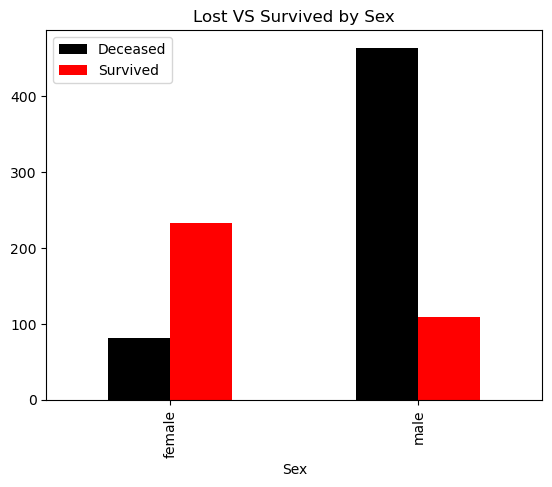

In [19]:
survived_by_sex = tmain.groupby("Sex")["Survived"].value_counts().unstack()
survived_by_sex.plot(kind= "bar", title = "Lost VS Survived by Sex", color = ["Black", "Red"])
plt.legend(["Deceased", "Survived"])
plt.show()


### Summary & Conclusion
Based on the statistical analysis and observation reserch Lost VS Survived by Sex:
There is evidents that probability survived Female rate is 74.2% and deceased Female rate is 25.8% compared to survived male rate is 19.02% and deceased male rate is 80.98%;
109 people who are male got survived and 464 people got lost compared to 233 female got survived and 81 people got lost.

Therefore we concludes that there is significant evindence that Female survival rate is significantly higher compare to Male, which makes sense because during the Titanic tragedy children and women were in saving priority.

### End question 4

### Question 5. Lost vs survived by class.
### In other words:
### How many people got lost and how many people got survived if they were in 1st class, 2nd class, or 3rd class
### What is probability survival rate for people of 1st class, 2nd class, or 3rd class on the Titanic?

#### Code for calculating count of how many people were on the boat, how many got lost and how many got survived in 1st class, 2nd class, and 3rd class

In [61]:
# New data frame
dataClass = tmain[["Survived", "Pclass"]]
dataClass

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3
...,...,...
882,0,2
883,1,1
884,0,3
885,1,1


In [62]:
# general data info
dataClass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  887 non-null    int64
 1   Pclass    887 non-null    int64
dtypes: int64(2)
memory usage: 14.0 KB


In [63]:
# Select rows by class
dataClass1 = dataClass.loc[dataClass["Pclass"]== 1]
dataClass2 = dataClass.loc[dataClass["Pclass"]== 2]
dataClass3 = dataClass.loc[dataClass["Pclass"]== 3]

In [64]:
dataClass1.head(3)

,Survived,Pclass
1,1,1
3,1,1
6,0,1


In [65]:
dataClass2.head(3)

,Survived,Pclass
9,1,2
15,1,2
17,1,2


In [66]:
dataClass3.head(3)

,Survived,Pclass
0,0,3
2,1,3
4,0,3


In [67]:
# Lost VS Survived variables Class 1
dataClass1_survived = dataClass1.loc[dataClass1["Survived"] == 1]
dataClass1_sink = dataClass1.loc[dataClass1["Survived"] == 0]

In [68]:
# Lost VS Survived variables Class 2
dataClass2_survived = dataClass2.loc[dataClass2["Survived"] == 1]
dataClass2_sink = dataClass2.loc[dataClass2["Survived"] == 0]

In [69]:
# Lost VS Survived variables Class 3
dataClass3_survived = dataClass3.loc[dataClass3["Survived"] == 1]
dataClass3_sink = dataClass3.loc[dataClass3["Survived"] == 0]

In [70]:
# Total people in class 1
total_Class1 = dataClass1.count()
total_Class1

Survived    216
Pclass      216
dtype: int64

In [71]:
# Total in class 2
total_Class2 = dataClass2.count()
total_Class2

Survived    184
Pclass      184
dtype: int64

In [72]:
# Total people class 3
total_Class3 = dataClass3.count()
total_Class3

Survived    487
Pclass      487
dtype: int64

In [73]:
# Count Survived class 1
dataClass1_survived = dataClass1_survived.count()
dataClass1_survived

Survived    136
Pclass      136
dtype: int64

In [74]:
# Count Lost class 1
dataClass1_sink = dataClass1_sink.count()
dataClass1_sink

Survived    80
Pclass      80
dtype: int64

In [75]:
# Count Survived class 2
dataClass2_survived = dataClass2_survived.count()
dataClass2_survived

Survived    87
Pclass      87
dtype: int64

In [76]:
# Count Lost class 2
dataClass2_sink = dataClass2_sink.count()
dataClass2_sink

Survived    97
Pclass      97
dtype: int64

In [77]:
# Count Survived class 3
dataClass3_survived = dataClass3_survived.count()
dataClass3_survived

Survived    119
Pclass      119
dtype: int64

In [78]:
# Count Lost class 3
dataClass3_sink = dataClass3_sink.count()
dataClass3_sink

Survived    368
Pclass      368
dtype: int64

#### Code for calculating Probability for people who got survived and got lost in the 1st class

In [79]:
# Probability Survived Class 1
probab_survived_Class1 = round((dataClass1_survived / total_Class1) * 100, 2)
probab_survived_Class1

Survived    62.96
Pclass      62.96
dtype: float64

In [80]:
# Probability lost Class 1
probab_lost_Class1 = 100 - probab_survived_Class1
probab_lost_Class1

Survived    37.04
Pclass      37.04
dtype: float64

### Analysis & Interpretetion
#### Results of calculation above show there is evindents that:
* Out of total 216 people of the 1st class 136 people were survived and 80 people were lost.
* Probaility for people of the 1st class survived rate is 62.96% VS deceased rate is 37.04%.


#### Code for calculating Probability for people who got survived and got lost in the 2nd class

In [81]:
# Probability Survived Class 2
probab_survived_Class2 = round((dataClass2_survived / total_Class2) * 100, 2)
probab_survived_Class2

Survived    47.28
Pclass      47.28
dtype: float64

In [82]:
# Probability lost Class 2
probab_lost_Class2 = 100 - probab_survived_Class2
probab_lost_Class2

Survived    52.72
Pclass      52.72
dtype: float64

### Analysis & Interpretetion
#### Results of calculation above show there is evindents that:
* Out of total 184 people of the 2nd class 87 people were survived and 97 people were lost.
* Probaility for people of the 2nd class survived rate is 47.28% VS deceased rate is 52.72%.

#### Code for calculating Probability for people who got survived and got lost in the 3rd class

In [46]:
# Probability Survived Class 3
probab_survived_Class3 = round((dataClass3_survived / total_Class3) * 100, 2)
probab_survived_Class3

Survived    24.44
Pclass      24.44
dtype: float64

In [47]:
# Probability lost Class 3
probab_lost_Class3 = 100 - probab_survived_Class3
probab_lost_Class3

Survived    75.56
Pclass      75.56
dtype: float64

### Analysis & Interpretetion
#### Results of calculation above show there is evindents that:
* Out of total 487 people of the 3rd class 119 people were survived and 368 people were lost.
* Probaility for people of the 3rd class survived rate is 24.44% VS deceased rate is 75.56%.

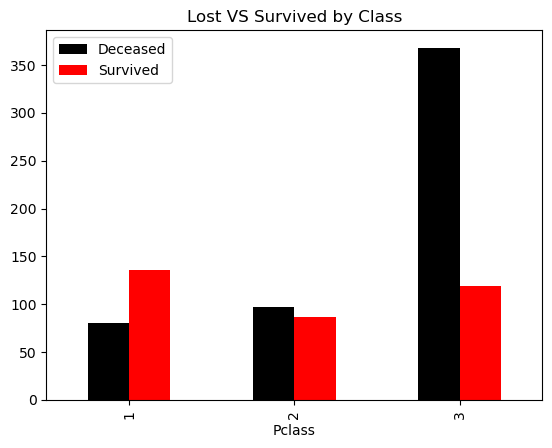

In [52]:
# Vizualization
survived_by_class = dataClass.groupby("Pclass")["Survived"].value_counts().unstack()
survived_by_class.plot(kind='bar', color = ["Black", "Red"], title = "Lost VS Survived by Class")
plt.legend(["Deceased", "Survived"])
plt.show()

### Summary & Conclusion
Based on the statistical analysis and observation reserch Lost VS Survived by class:
There is evidents that probability survived rate of the 1st class is 62.96% VS deceased rate is 37.04%, of the 2nd class survived rate is 47.28% VS deceased rate is 52.72%, and of the 3rd class survived rate is 24.44% VS deceased rate is 75.56%.
For the 1st class out of total 216 people, 136 people were survived and 80 people were lost.
For the 2nd class out of total 184 people, 87 people were survived and 97 people were lost.
For the 3rd class out of total 487 people, 119 people were survived and 368 people were lost.

Therefore we concludes that there is significant evindence that passengers of the 1st class survival rate is significantly higher compare to passengers in the 2nd and 3rd class.

### End question 5

### Question 6. Calculate the conditional probability that a person survives given their sex and passenger-class.
### In other words:
### What is probablity for Male and Female survival rate(in %) in they were passenger of 1st class, 2nd class, and 3rd class

In [4]:
# New dataframe
df = tmain[["Survived", "Sex", "Pclass"]]

#### Code for calculeting conditional probability that a person is Female or Male survives in 1st passenger-class.

In [6]:
# Select rows by class
#Selecting rows for female
dfF1 = df.loc[df["Sex"] == "female"]
dfF1 = dfF1.loc[dfF1["Pclass"]== 1]
dfF1.head(5)

,Survived,Sex,Pclass
1,1,female,1
3,1,female,1
11,1,female,1
31,1,female,1
51,1,female,1


In [7]:
# Select rows by class
#Selecting rows for male
dfM1 = df.loc[df["Sex"] == "male"]
dfM1 = dfM1.loc[dfM1["Pclass"]== 1]
dfM1.head(5)

,Survived,Sex,Pclass
6,0,male,1
23,1,male,1
27,0,male,1
30,0,male,1
34,0,male,1


In [8]:
# Lost VS Survived female variables Class 1
dfF1_survived = dfF1.loc[dfF1["Survived"] == 1]
dfF1_sink = dfF1.loc[dfF1["Survived"] == 0]

In [9]:
# Lost VS Survived male variables Class 1
dfM1_survived = dfM1.loc[dfM1["Survived"] == 1]
dfM1_sink = dfM1.loc[dfM1["Survived"] == 0]

In [10]:
# Total Female class 1
total_FClass1 = dfF1.count()
total_FClass1

Survived    94
Sex         94
Pclass      94
dtype: int64

In [11]:
# Total Male class 1
total_MClass1 = dfM1.count()
total_MClass1

Survived    122
Sex         122
Pclass      122
dtype: int64

In [12]:
# Count Survived Female class 1
dfF1_survived = dfF1_survived.count()
dfF1_survived

Survived    91
Sex         91
Pclass      91
dtype: int64

In [13]:
# Count Survived Male class 1
dfM1_survived = dfM1_survived.count()
dfM1_survived

Survived    45
Sex         45
Pclass      45
dtype: int64

In [14]:
# Count Lost Female class 1
dfF1_sink = dfF1_sink.count()
dfF1_sink

Survived    3
Sex         3
Pclass      3
dtype: int64

In [15]:
# Count Lost Male class 1
dfM1_sink = dfM1_sink.count()
dfM1_sink

Survived    77
Sex         77
Pclass      77
dtype: int64

In [16]:
# Probability Female Survived Class 1
probab_survived_FClass1 = round((dfF1_survived / total_FClass1) * 100, 2)
probab_survived_FClass1

Survived    96.81
Sex         96.81
Pclass      96.81
dtype: float64

In [17]:
# Probability Female Lost Class 1
probab_lost_FClass1 = 100 - probab_survived_FClass1
probab_lost_FClass1

Survived    3.19
Sex         3.19
Pclass      3.19
dtype: float64

In [18]:
# Probability Male Survived Class 1
probab_survived_MClass1 = round((dfM1_survived / total_MClass1) * 100, 2)
probab_survived_MClass1

Survived    36.89
Sex         36.89
Pclass      36.89
dtype: float64

In [19]:
# Probability Male Lost Class 1
probab_lost_MClass1 = 100 - probab_survived_MClass1
probab_lost_MClass1

Survived    63.11
Sex         63.11
Pclass      63.11
dtype: float64

### Analysis & Interpretetion
#### Results of calculation above show there is evindents that:
* Conditional probability that a person is Female survives in 1st passenger-class is 96.81% and Male 36.89%
* Conditional probability that a person is Female get lost in 1st passenger-class is 3.19% and Male 63.11%¶

#### Code for calculeting conditional probability that a person is Female or Male survives in 2nd passenger-class.

In [3]:
# New dataFrame
df = tmain[["Survived", "Sex", "Pclass"]]

In [4]:
# Select rows for 2nd class
#Selecting rows for female
dfF2 = df.loc[df["Sex"] == "female"]
dfF2 = dfF2.loc[dfF2["Pclass"]== 2]
dfF2.head(5)

,Survived,Sex,Pclass
9,1,female,2
15,1,female,2
41,0,female,2
42,1,female,2
52,1,female,2


In [5]:
# Select rows for 2nd class
#Selecting rows for male
dfM2 = df.loc[df["Sex"] == "male"]
dfM2 = dfM2.loc[dfM2["Pclass"]== 2]
dfM2.head(5)

,Survived,Sex,Pclass
17,1,male,2
20,0,male,2
21,1,male,2
33,0,male,2
69,0,male,2


In [6]:
# Lost VS Survived female variables Class 2
dfF2_survived = dfF2.loc[dfF2["Survived"] == 1]
dfF2_sink = dfF2.loc[dfF2["Survived"] == 0]

In [7]:
# Lost VS Survived male variables Class 2
dfM2_survived = dfM2.loc[dfM2["Survived"] == 1]
dfM2_sink = dfM2.loc[dfM2["Survived"] == 0]

In [8]:
# Total Female class 2
total_FClass2 = dfF2.count()
total_FClass2

Survived    76
Sex         76
Pclass      76
dtype: int64

In [10]:
# Total Male class 2
total_MClass2 = dfM2.count()
total_MClass2

Survived    108
Sex         108
Pclass      108
dtype: int64

In [11]:
# Count Survived Female class 2
dfF2_survived = dfF2_survived.count()
dfF2_survived

Survived    70
Sex         70
Pclass      70
dtype: int64

In [12]:
# Count Survived Male class 2
dfM2_survived = dfM2_survived.count()
dfM2_survived

Survived    17
Sex         17
Pclass      17
dtype: int64

In [13]:
# Count Lost Female class 2
dfF2_sink = dfF2_sink.count()
dfF2_sink

Survived    6
Sex         6
Pclass      6
dtype: int64

In [14]:
# Count Lost Male class 2
dfM2_sink = dfM2_sink.count()
dfM2_sink

Survived    91
Sex         91
Pclass      91
dtype: int64

In [15]:
# Probability Female Survived Class 2
probab_survived_FClass2 = round((dfF2_survived / total_FClass2) * 100, 2)
probab_survived_FClass2

Survived    92.11
Sex         92.11
Pclass      92.11
dtype: float64

In [16]:
# Probability Female Lost Class 2
probab_lost_FClass2 = 100 - probab_survived_FClass2
probab_lost_FClass2

Survived    7.89
Sex         7.89
Pclass      7.89
dtype: float64

In [19]:
# Probability Male Survived Class 2
probab_survived_MClass2 = round((dfM2_survived / total_MClass2) * 100, 2)
probab_survived_MClass2

Survived    15.74
Sex         15.74
Pclass      15.74
dtype: float64

In [20]:
# Probability Male Lost Class 2
probab_lost_MClass2 = 100 - probab_survived_MClass2
probab_lost_MClass2

Survived    84.26
Sex         84.26
Pclass      84.26
dtype: float64

### Analysis & Interpretetion
#### Results of calculation above show there is evindents that:
* Conditional probability that a person is Female survives in 2nd passenger-class is 92.11% and Male 15.74%
* Conditional probability that a person is Female get lost in 2nd passenger-class is 7.89% and Male 84.26%

#### Code for calculeting conditional probability that a person is Female or Male survives in 3rd passenger-class.

In [21]:
# New dataFrame
df = tmain[["Survived", "Sex", "Pclass"]]

In [22]:
# Select rows by class
#Selecting rows for female
dfF3 = df.loc[df["Sex"] == "female"]
dfF3 = dfF3.loc[dfF3["Pclass"]== 3]

dfF3.head(5)

,Survived,Sex,Pclass
2,1,female,3
8,1,female,3
10,1,female,3
14,0,female,3
18,0,female,3


In [24]:
# Select rows by class
#Selecting rows for male
dfM3 = df.loc[df["Sex"] == "male"]
dfM3 = dfM3.loc[dfM3["Pclass"]== 3]
dfM3.head(5)

,Survived,Sex,Pclass
0,0,male,3
4,0,male,3
5,0,male,3
7,0,male,3
12,0,male,3


In [25]:
# Lost VS Survived female variables Class 3
dfF3_survived = dfF3.loc[dfF3["Survived"] == 1]
dfF3_sink = dfF3.loc[dfF3["Survived"] == 0]

In [26]:
# Lost VS Survived male variables Class 3
dfM3_survived = dfM3.loc[dfM3["Survived"] == 1]
dfM3_sink = dfM3.loc[dfM3["Survived"] == 0]

In [27]:
# Total Female class 3
total_FClass3 = dfF3.count()
total_FClass3

Survived    144
Sex         144
Pclass      144
dtype: int64

In [28]:
# Total Male class 3
total_MClass3 = dfM3.count()
total_MClass3

Survived    343
Sex         343
Pclass      343
dtype: int64

In [29]:
# Count Survived Female class 3
dfF3_survived = dfF3_survived.count()
dfF3_survived

Survived    72
Sex         72
Pclass      72
dtype: int64

In [30]:
# Count Survived Male class 3
dfM3_survived = dfM3_survived.count()
dfM3_survived

Survived    47
Sex         47
Pclass      47
dtype: int64

In [31]:
# Count Lost Female class 3
dfF3_sink = dfF3_sink.count()
dfF3_sink

Survived    72
Sex         72
Pclass      72
dtype: int64

In [32]:
# Count Lost Male class 3
dfM3_sink = dfM3_sink.count()
dfM3_sink

Survived    296
Sex         296
Pclass      296
dtype: int64

In [33]:
# Probability Female Survived Class 3
probab_survived_FClass3 = round((dfF3_survived / total_FClass3) * 100, 2)
probab_survived_FClass3

Survived    50.0
Sex         50.0
Pclass      50.0
dtype: float64

In [34]:
# Probability Female Lost Class 3
probab_lost_FClass3 = 100 - probab_survived_FClass3
probab_lost_FClass3

Survived    50.0
Sex         50.0
Pclass      50.0
dtype: float64

In [35]:
# Probability Male Survived Class 3
probab_survived_MClass3 = round((dfM3_survived / total_MClass3) * 100, 2)
probab_survived_MClass3

Survived    13.7
Sex         13.7
Pclass      13.7
dtype: float64

In [36]:
# Probability Male Lost Class 3
probab_lost_MClass3 = 100 - probab_survived_MClass3
probab_lost_MClass3

Survived    86.3
Sex         86.3
Pclass      86.3
dtype: float64

### Analysis & Interpretetion
#### Results of calculation above show there is evindents that:
* Conditional probability that a person is Female survives in 3rd passenger-class is 50.00% and Male 13.70%
* Conditional probability that a person is Female get lost in 3rd passenger-class is 50.00% and Male 86.30%

### Vizualization

In [6]:
Survival = tmain[["Survived", "Pclass", "Sex"]].copy()

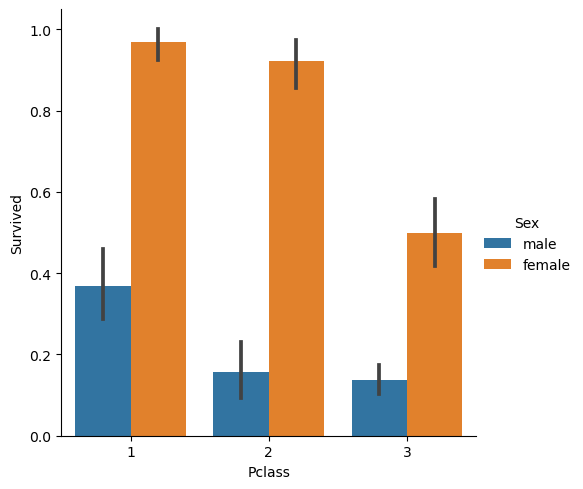

In [17]:
sns.catplot(
    data = Survival, x="Pclass", y="Survived", hue="Sex",
    kind="bar"
)

### Summary & Conclusion
Based on the statistical analysis and observation reserch in order to calculate the conditional probability that a person survives given their sex and passenger-class:
There is evidents that conditional probability survival rate for 1st class:
* If person is Female survival rate is 96.81% and Male 36.89%
* If person is Female deceased rate is 3.19% and Male 63.11%¶

There is evidents thatconditional probability survival rate for 2nd class:
* If person is Female survival rate is 92.11% and Male 15.74%
* If person is Female deceased rate is 7.89% and Male 84.26%

There is evidents thatconditional probability survival rate for 3rd class:
* If person is Female survival rate is 50.00% and Male 13.70%
* If person is Female deceased rate is 50.00% and Male 86.30%


Therefore we concludes that there is significant evindence that:
* Female passengers of the 1st class survival rate is significantly higher compare to Female passengers in the 2nd and 3rd class.
* Male passengers of the 1st class survival rate is significantly higher compare to Male passengers in the 2nd and 3rd class.

### End question 6

### End